In [35]:
import numpy as np
import matplotlib.pyplot as plt

import concave_enclosed_csf_list
import _image_processing
import _image_curve
import _utils
import _scaling_functions
import _metrics

In [38]:
import importlib
importlib.reload(concave_enclosed_csf_list)
importlib.reload(_metrics)

<module '_metrics' from 'C:\\Users\\ghage\\PycharmProjects\\enclosedcurveshorteningflow\\_metrics.py'>

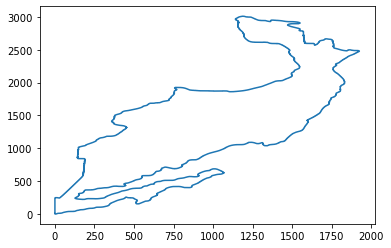

In [78]:
# im = _image_processing.load_image(r"C:/Users/ghage/PycharmProjects/morphoscale/lib/polygon_test_shapes/heart.bmp")
# im = _image_processing.load_image(
#     r"C:/Users/ghage/PycharmProjects/enclosedcurveshorteningflow/lib/silhouettes/opened/united-states-silhouette.jpg")
# im = _image_processing.load_image(
#     r"C:/Users/ghage/PycharmProjects/enclosedcurveshorteningflow/lib/silhouettes/geographic/united-states-silhouette.jpg")
im = _image_processing.load_image(
    r"C:/Users/ghage/PycharmProjects/enclosedcurveshorteningflow/lib/silhouettes/geographic/mexico-silhouette.jpg")
im = np.pad(im, )
im = _image_processing.smooth_image(im, 1)
curve = _image_curve.ImageCurve(im).curve()
plt.plot(*curve.transpose())

In [66]:
curve_obj = concave_enclosed_csf_list.ConcaveEnclosedCSFList(curve, 
                                                             max_iterations=1000,
                                                             refresh_interval=100, 
                                                             save_interval=10)

In [67]:
curve_obj.run()

Iteration: 0, Concavity:  1610.74, Area to original %:  100.00
Iteration: 100, Concavity:  24.07, Area to original %:  91.96
Iteration: 200, Concavity:  16.10, Area to original %:  84.74
Iteration: 300, Concavity:  16.06, Area to original %:  77.92
Iteration: 400, Concavity:  15.66, Area to original %:  71.41
Iteration: 500, Concavity:  13.15, Area to original %:  65.06
Iteration: 600, Concavity:  9.82, Area to original %:  58.50
Iteration: 700, Concavity:  8.79, Area to original %:  51.28
Iteration: 800, Concavity:  8.51, Area to original %:  44.30
Iteration: 900, Concavity:  8.38, Area to original %:  37.86


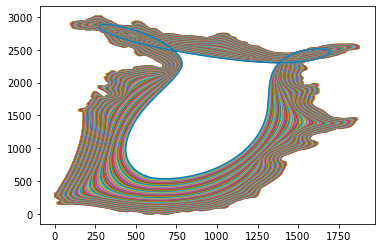

In [68]:
_ =[plt.plot(*curve.transpose()) for curve in curve_obj.curves]

In [51]:
sf = _scaling_functions.f_sigmoid(alpha=10, a=0.1)

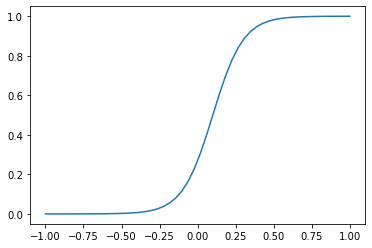

In [52]:
x = np.linspace(-1, 1)
plt.plot(x, sf(x))

In [72]:
curve_obj = concave_enclosed_csf_list.ConcaveEnclosedCSFList(curve, 
                                                             max_iterations=2000,
                                                             refresh_interval=100, 
                                                             save_interval=100, 
                                                             scaling_function=sf, step_size=0.3)

In [73]:
curve_obj.run()

Iteration: 0, Concavity:  1610.74, Area to original %:  100.00
Iteration: 100, Concavity:  30.23, Area to original %:  97.33
Iteration: 200, Concavity:  19.40, Area to original %:  94.95
Iteration: 300, Concavity:  13.75, Area to original %:  92.60
Iteration: 400, Concavity:  10.96, Area to original %:  90.35
Iteration: 500, Concavity:  9.40, Area to original %:  88.18
Iteration: 600, Concavity:  8.42, Area to original %:  86.10
Iteration: 700, Concavity:  7.77, Area to original %:  84.08
Iteration: 800, Concavity:  7.33, Area to original %:  82.13
Iteration: 900, Concavity:  7.14, Area to original %:  80.24
Iteration: 1000, Concavity:  6.79, Area to original %:  78.40
Iteration: 1100, Concavity:  6.23, Area to original %:  76.61
Iteration: 1200, Concavity:  5.53, Area to original %:  74.83
Iteration: 1300, Concavity:  5.05, Area to original %:  73.07
Iteration: 1400, Concavity:  4.64, Area to original %:  71.32
Iteration: 1500, Concavity:  4.29, Area to original %:  69.60
Iteration: 1

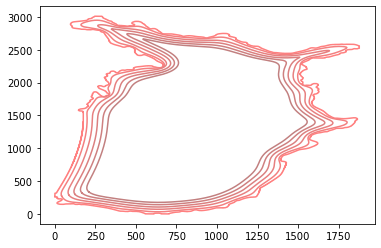

In [74]:
_ =[plt.plot(*curve.transpose(), c=(1-i/len(curve_obj.curves), 0.5, 0.5)) for i, curve in enumerate(curve_obj.curves[::4])]